# CNN on MNIST Handwritten digits recognition

In [10]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
(X_train_,y_train_),(X_test_,y_test_) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

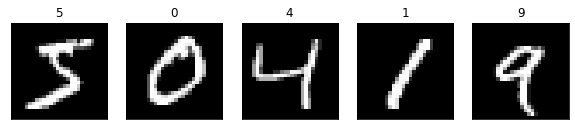

In [5]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

## Image data preprocessing

In [7]:
num_classes=10
epochs =3
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
#print(X_train[0])
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train/=255.0
X_test/=255.0
#print(X_train[0])

In [9]:
#1D to 10 bins representing 10 digits
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


### Building Neural Nets

In [12]:
cnn = Sequential()

In [13]:
cnn.add(Conv2D(32 , kernel_size = (5,5), input_shape = (28,28,1),padding = "same", activation ="relu"))
# Maxpooling layer
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64 , kernel_size = (5,5), padding = "same", activation ="relu"))
# Maxpooling layer
cnn.add(MaxPooling2D())

# Flatten the network
cnn.add(Flatten()) # because we have a fully connected network next


cnn.add(Dense(1024,activation = 'relu'))

# Output layer
cnn.add(Dense(10,activation = 'softmax'))

### Compiling the model

In [14]:
cnn.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3212288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Model training

In [18]:
history = cnn.fit(X_train, y_train, epochs = 5,verbose=1, validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 135s 70ms/step - loss: 0.2155 - accuracy: 0.9304 - val_loss: 0.0448 - val_accuracy: 0.9838
Epoch 2/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.0305 - val_accuracy: 0.9895
Epoch 3/5
1875/1875 [==============================] - 168s 89ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0219 - val_accuracy: 0.9925
Epoch 4/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.0266 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0311 - val_accuracy: 0.9907


In [19]:
# alternate way
#cnn.load_weights("weights/cnn-model5.h5")


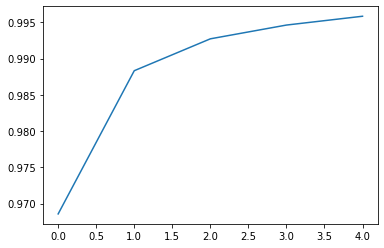

In [20]:
plt.plot(history.history["accuracy"])

### Accuracy and Validation Accuracy with Loss

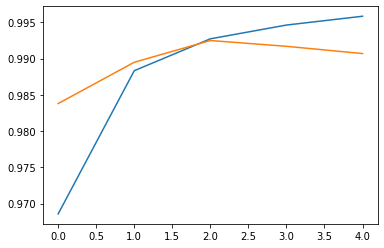

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

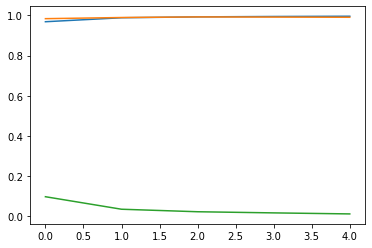

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])

# Model Evaluation

In [24]:
sc = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0311 - accuracy: 0.9907


In [25]:
pred = cnn.predict(X_test) #
#pred

In [26]:
# output of pred is in the shape 10000, 10 need to get the orginal output
pred  = np.argmax(pred, axis = 1)
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

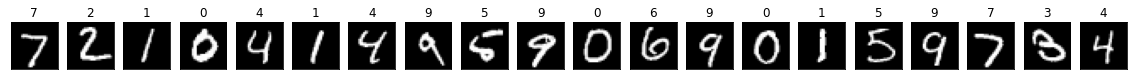

In [27]:
fig, axes = plt.subplots(ncols=20, sharex=False,
                         sharey=True, figsize=(20, 8))
for i in range(20):
    axes[i].set_title(pred[i])
    axes[i].imshow(X_test_[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()